In [1]:
from google.cloud import vision
import os

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="creds.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import io

path = './Vin_number_internship/IMG_0847.JPG'
with io.open(path, 'rb') as image_file:
        content = image_file.read()
image_data = cv2.imread(path)
# plt.imshow(image_data)

## Manual Preprocessing

In [6]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

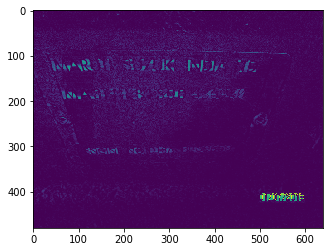

In [7]:
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
# sobel = cv2.Sobel(gray,ddepth=cv2.CV_32F, dx=1, dy=0)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt.imshow(tophat)
tophat=tophat.tobytes()
# sobel = sobel.tobytes()


~Creating Google Vision API Object for Image~

In [8]:
im_object = vision.types.Image(content=content)

~Fetching Response from the API

In [9]:
response = client.text_detection(image=im_object)
texts = response.text_annotations

In [14]:
save_text = []
for text in texts:
        print('\n"{}"'.format(text.description))
        save_text.append(text.description)
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

#         print('bounds: {}'.format(','.join(vertices)))


"MARUTI SUZUKI INDIA LTD
MA3FHEBTSOO 53693g
ENGINE NO. D13A:04696
01/07/2018
"

"MARUTI"

"SUZUKI"

"INDIA"

"LTD"

"MA3FHEBTSOO"

"53693g"

"ENGINE"

"NO."

"D13A:04696"

"01/07/2018"


In [11]:
def count_alpha_n_digs(text):
    dig_count = 0
    alpha_count = 0
    for char in text:
        if char.isalpha():
            alpha_count = alpha_count+1
        if char.isdigit():
            dig_count = dig_count+1
    
    return dig_count,alpha_count

~Since Images are too noisy and result from OCR may generate spaces between VIN, therefore using bruteforce instead of regex for detecting favourble VIN text and not going for only 17 char length alphanumeric word.~

In [15]:
possibles_matches = []
for ix in range(1,len(save_text)):
    tmp = save_text[ix]
    digs,alps = count_alpha_n_digs(tmp)
    if len(tmp) >= 17:
        if digs >0 and alps >0:
            possibles_matches=[]
            possibles_matches.append({'Text':tmp,'digits':digs,'alphas':digs})
            print('VIN : '+tmp)
            break
    if digs+alps > 5 and digs!=0 and alps!=0:
        possibles_matches.append({'Text':tmp,'digits':digs,'alpha':alps})
    
    

In [17]:
print('Possible Matches ')
for match in possibles_matches:
    
    print(match['Text'])

Possible Matches 
MA3FHEBTSOO
53693g
D13A:04696


In [18]:
len(possibles_matches)

3